In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.linalg as la
import scipy
from scipy.io import wavfile
import scipy.io
from scipy import signal
import matplotlib.pyplot as plt
import os
import librosa
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import interpreter as itp
import jams

In [2]:
gs_path = "./data/"
anno_dir = "annotation/"
audio_dir = 'audio_mono-mic/'
excerpt = "00_BN2-166-Ab_comp.jams"

In [3]:
jam = jams.load(os.path.join(gs_path+anno_dir, excerpt))

In [57]:
instructed_chords = jam.search(namespace='chord')[0]
performed_chords = jam.search(namespace='chord')[1]

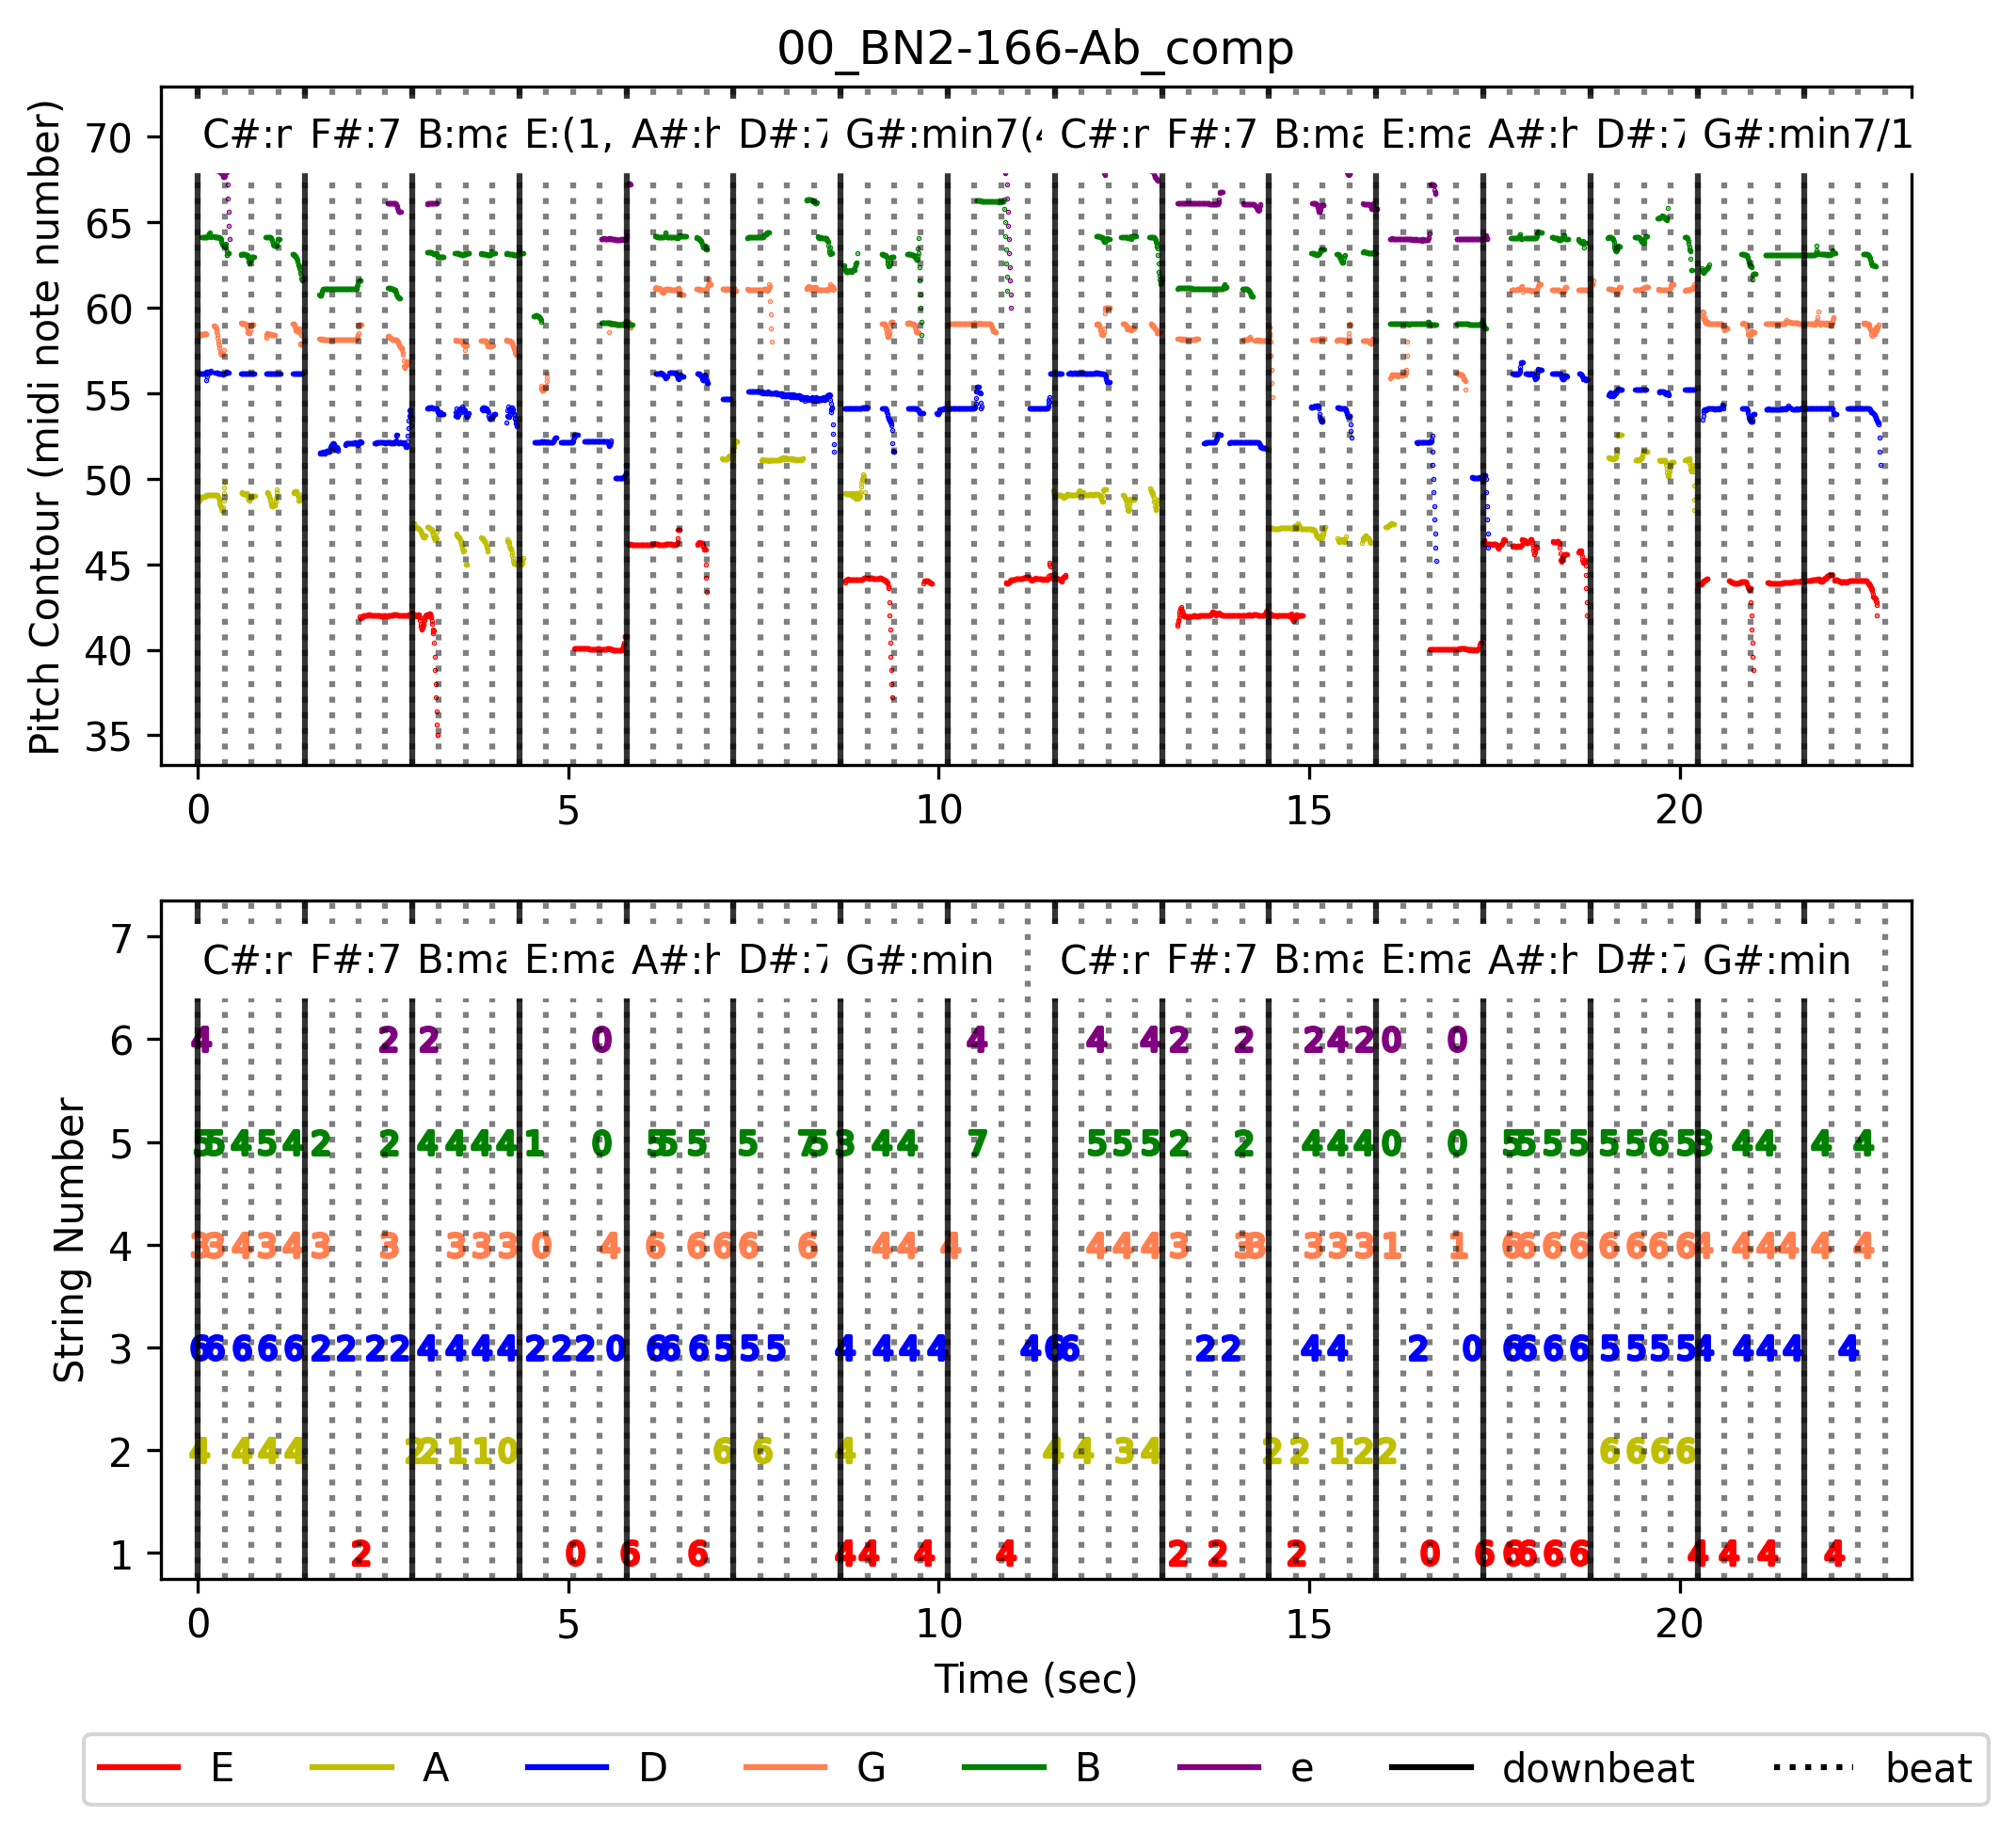

In [58]:
fig = plt.figure(figsize=(8,7), dpi=300)
ax1 = plt.subplot(211)
itp.visualize_jams_pt(jam) #pt for pitch track
ax2 = plt.subplot(212, sharex=ax1)
itp.tablaturize_jams(jam)
#plt.xlim(0, 10) # this is the time window in seconds that I'm plotting

itp.add_annotations(ax1, performed_chords, ygrow_ratio=0.04, label_xoffset=0.06, label_yoffset=2)
itp.add_annotations(ax2, instructed_chords, ygrow_ratio=0.2, label_xoffset=0.06, label_yoffset=-0.4)
plt.show()

In [4]:
from TabDataReprGen import *

In [69]:
BN1_129_Eb_comp = np.load('./spec_repr/c/00_BN2-166-Ab_comp.npz')
BN1_129_Eb_comp['labels'][220]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
jam.annotations["note_midi"]

,time,duration,value,confidence
0,7.457,0.464,44.01891665738137,None
1,7.924,0.923,44.224917745125516,None
2,8.871,0.192,44.10606451304718,None
3,14.835,0.488,46.05318474273903,None
4,15.333,1.416,46.071249352589135,None
5,17.015,0.128,44.00823636928933,None
6,17.707,0.551,43.98394695370204,None
,time,duration,value,confidence
0,0.049,0.424,51.036803851780434,None
1,0.520,0.418,51.03245930740626,None


In [32]:
str_midi_dict = {0: 40, 1: 45, 2: 50, 3: 55, 4: 59, 5: 64}
string_dict = {0: 'E', 1: 'A', 2: 'D', 3: 'G', 4: 'B', 5: 'e'}

s = 0
annos = jam.search(namespace='note_midi')

for string_tran in annos:
    for note in string_tran:
        start_time = note[0]
        midi_note = note[2]
        fret = int(round(midi_note - str_midi_dict[s]))
    s += 1

In [5]:
file_audio = os.path.join(gs_path + audio_dir, '00_BN2-166-Ab_comp_mic.wav')
gen = TabDataReprGen()
gen.load_rep_and_labels_from_raw_file('00_BN2-166-Ab_comp')

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


997

In [73]:
BN1_129_Eb_comp['repr'].shape

(997, 192)

In [75]:
full_x = np.pad(BN1_129_Eb_comp["repr"], [(4, 4), (0,0)], mode='constant')
sample_x = full_x[0:0 + 9]
sample_x.shape

(9, 192)

In [76]:
full_x.shape

(1005, 192)

In [6]:
sr_original, data = wavfile.read(file_audio)
data = data.astype(float)
data = librosa.util.normalize(data)
data = librosa.resample(data, sr_original, 22050)
data = np.abs(librosa.cqt(data,
                hop_length=512, 
                sr=22050, 
                n_bins=192, 
                bins_per_octave=24))
# shape (192, 997)
# 192 bins, 997 frames
# context window size 9

In [7]:
data.shape

(192, 997)

In [11]:
sr_original, data = wavfile.read(file_audio)
data = data.astype(float)
data = librosa.util.normalize(data)
data = librosa.resample(data, sr_original, 22050)
data = librosa.feature.chroma_cens(data, sr=22050, hop_length=512, n_octaves=8)
data.shape

(12, 997)